<a href="https://colab.research.google.com/github/Andre-1970/Machine_learning_classical_algorithms_Sem4/blob/main/jun_ml_EDA_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Разведочный анализ

Подключитесь к базе данных PostgreSQL и выгрузите таблицу `exploratory`, сохранив ее в датафрейм. <br> <br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `db_ds_students`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`.

In [132]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [124]:
# параметры подключения
params = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "db_ds_students",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}

# установка соединения с БД
conn = psycopg2.connect(**params)

# запрос на выгрузку таблицы exploratory
query = "SELECT * FROM exploratory"

# чтение данных в датафрейм
df = pd.read_sql_query(query, conn)

# закрытие соединения с БД
conn.close()

In [125]:
df.head(5)

,feature_1,feature_2,feature_3,feature_4,feature_5
0,2.4399302341553932,-2.180960698389708,33.4684964804719,-1.9273880121739875,-5.3213919475057105
1,1.7705797495879034,-1.174880454210172,0.9895926481354946,-1.1396809115663187,-2.0802195404111687
2,0.7428169764168391,-0.2634829113111655,0.16814863490368492,-0.3324379721161745,-0.19571957951766614
3,-1.510891800324271,2.7125712625192238,-2.6856430298672915,2.0584952423727403,-4.098401678335551
4,-0.4835110394772655,0.096511221663355,-0.028703495808161117,0.1687629004635419,-0.04666424110766956


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   feature_1  100 non-null    object
 1   feature_2  100 non-null    object
 2   feature_3  100 non-null    object
 3   feature_4  100 non-null    object
 4   feature_5  100 non-null    object
dtypes: object(5)
memory usage: 4.0+ KB


In [127]:
for feature in df.columns:
  df[feature] = df[feature].astype('float')
  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  100 non-null    float64
 1   feature_2  100 non-null    float64
 2   feature_3  100 non-null    float64
 3   feature_4  100 non-null    float64
 4   feature_5  100 non-null    float64
dtypes: float64(5)
memory usage: 4.0 KB


Постройте гистограммы распределения для каждой переменной. Поэксперементируйте с количеством "разбивок" (bins). Опишите распределение каждой переменной. В каких областях (пример: от нуля до 2 расположено примерно треть всех значений) сосредоточено больше значений, в каких меньше. 

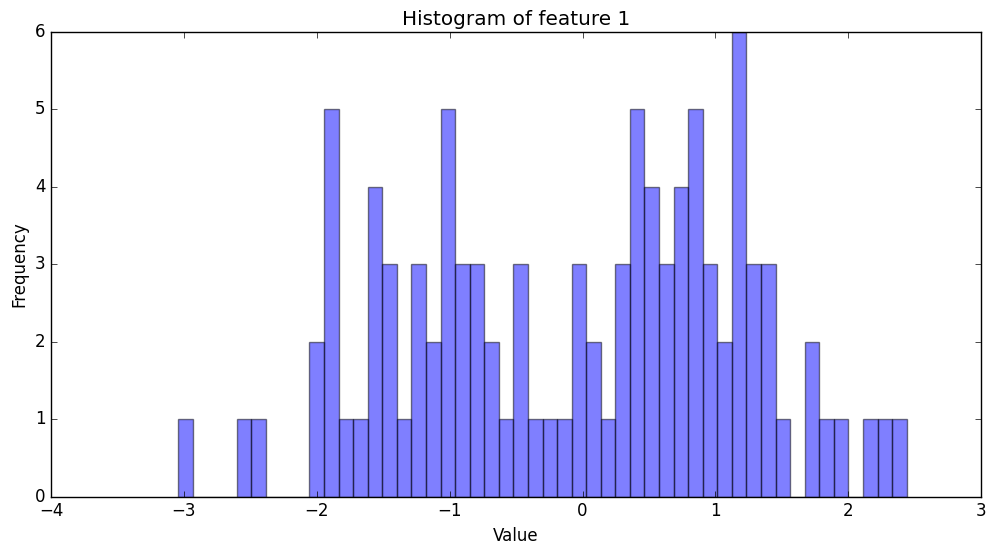

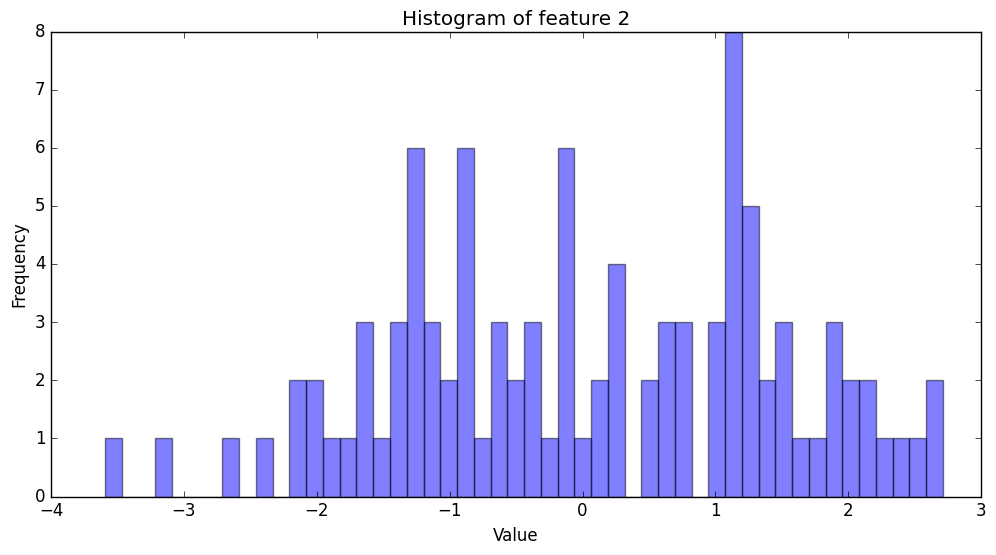

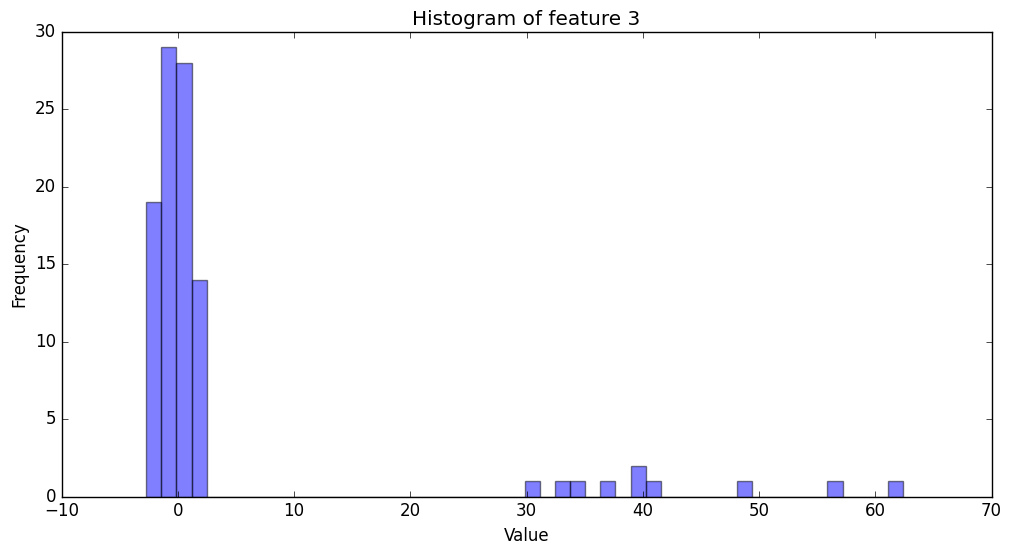

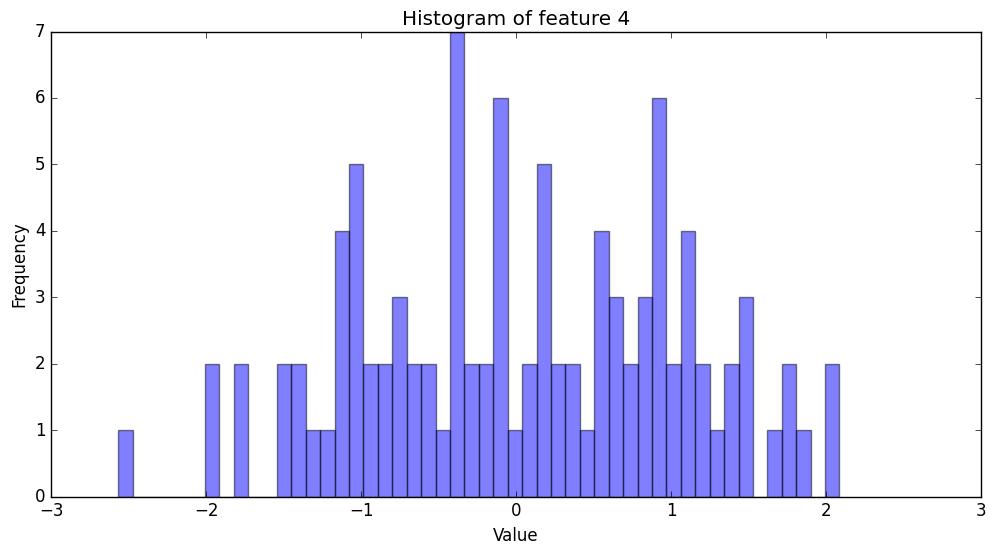

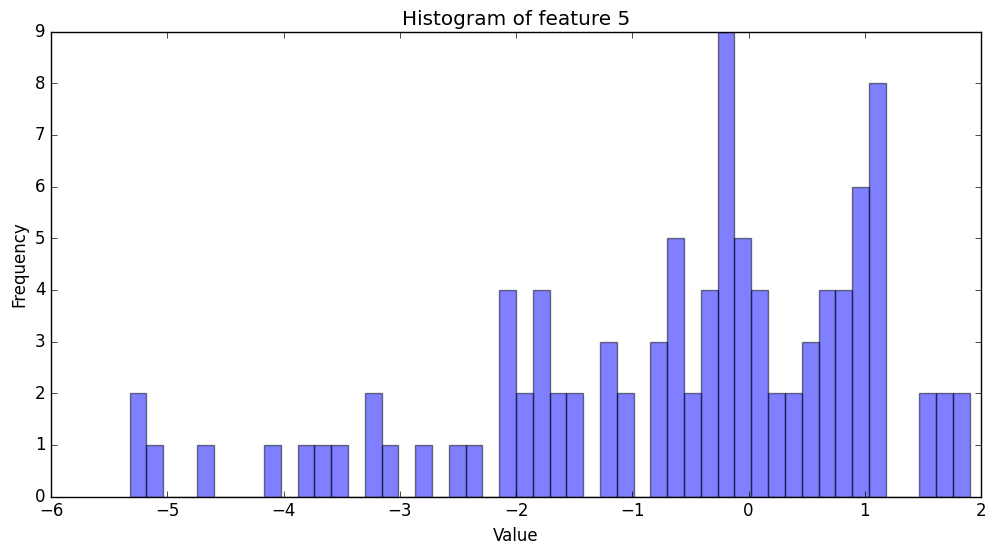

In [128]:
# установим параметры графиков
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 12})

# построим гистограммы для каждой переменной
for i in range(1, 6):
    plt.hist(df['feature_' + str(i)], bins=50, alpha=0.5, edgecolor='black')
    plt.title('Histogram of feature ' + str(i))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

* feature_1: имеет примерно нормальное распределение, скошенность влево. Большинство значений лежит в интервале [-2, 2].
* feature_2: имеет распределение, близкое к нормальному. Большинство значений лежит в интервалах [-2, 0.2] и [1, 2.7].
* feature_3: распределение скошено вправо, имеет длинный правый хвост, что указывает на наличие выбросов. Большинство значений лежит в интервале [-2, 4].
* feature_4: имеет распределение, близкое к нормальному, скошенность вправо. Большинство значений лежит в интервале [-2, 2].
* feature_5: имеет распределение, которое сосредоточено вокруг отрицательных значений, скошенность вправо. Большинство значений лежит в интервале [-2, 1.1].


*Скошенность (skewness) — это характеристика формы распределения случайной величины. Распределение считается скошенным вправо (positive skewness), если хвост распределения смещен вправо, то есть большая часть значений сосредоточена на меньших значениях, а выбросы на больших. Распределение называется скошенным влево (negative skewness), если хвост распределения смещен влево, то есть большая часть значений сосредоточена на больших значениях, а выбросы на меньших. Если распределение симметрично относительно среднего значения, то скос равен нулю.*

*Нормальное распределение (или распределение Гаусса) - это распределение вероятностей, которое имеет колоколообразную форму и является одним из наиболее распространенных в статистике. Оно характеризуется тем, что большинство значений находятся вблизи среднего значения, а чем дальше от среднего, тем меньше вероятность такого значения. Нормальное распределение встречается во многих естественных и социальных явлениях, например, в росте людей, IQ, доходах, количестве ошибок при выполнении задач и т.д.*

Постройте ящик с усами для каждой переменной. Опишите распределение данных. Прокомментируйте наличие или отсутствие выбросов.

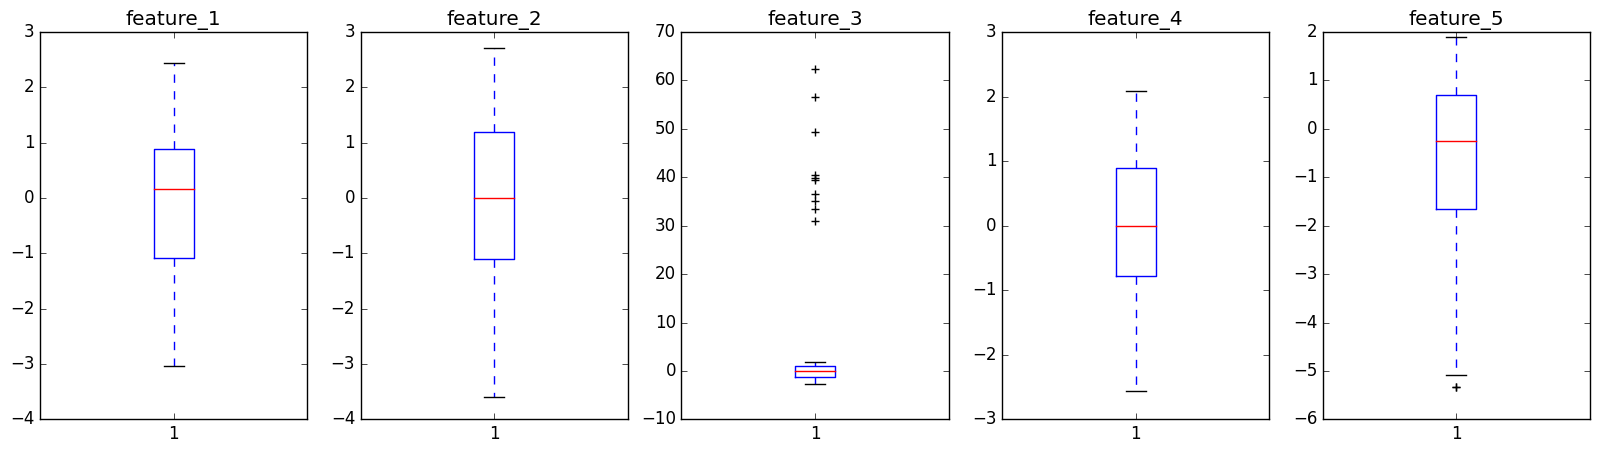

        feature_1   feature_2   feature_3   feature_4   feature_5
count  100.000000  100.000000  100.000000  100.000000  100.000000
mean    -0.065085    0.037519    3.958900    0.038294   -0.602373
std      1.248609    1.419701   13.300371    1.030048    1.658605
min     -3.042490   -3.593248   -2.725758   -2.566864   -5.325568
25%     -1.076774   -1.099268   -1.214747   -0.778637   -1.652154
50%      0.171540    0.000149   -0.046936    0.000794   -0.251712
75%      0.878959    1.186975    1.089343    0.886191    0.707675
max      2.439930    2.712571   62.381761    2.086148    1.902054


In [129]:
# Строим ящик с усами для каждой переменной
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

for i, feature in enumerate(df.columns):
    axs[i].boxplot(df[feature])
    axs[i].set_title(feature)

plt.show()


print(df.describe())

* feature_1 имеет симметричное распределение вокруг среднего значения, без выбросов.
* feature_2 имеет асимметричное распределение, с небольшим разбросом в правой части, без выбросов.
* feature_3 имеет асимметричное распределение с большим количеством выбросов. Есть несколько значений, находящихся за пределами усов.
* feature_4 имеет симметричное распределение вокруг среднего значения, без выбросов.
* feature_5 имеет асимметричное распределение, с большим разбросом в правой части. Есть один выброс со значением -5.2, который находится за пределами усов.

Допустим, мы хотим построить регрессионную модель по имеющимся данным и исследовать влияние остальных переменных на переменную `feature_4`. Постройте диаграммы рассеяния. Определите по графикам, какие независимые переменные имело бы смысл включить в модель регрессии?

In [130]:
df

,feature_1,feature_2,feature_3,feature_4,feature_5
0,2.439930,-2.180961,33.468496,-1.927388,-5.321392
1,1.770580,-1.174880,0.989593,-1.139681,-2.080220
2,0.742817,-0.263483,0.168149,-0.332438,-0.195720
3,-1.510892,2.712571,-2.685643,2.058495,-4.098402
4,-0.483511,0.096511,-0.028703,0.168763,-0.046664
...,...,...,...,...,...
95,0.107649,-3.101786,56.490912,-1.993768,-0.333903
96,1.759630,-1.428565,1.264442,-1.298354,-2.513746
97,0.843823,1.187656,-1.410026,0.566681,1.002171
98,0.867154,1.111556,-1.331718,0.513167,0.963890


In [133]:
# разделение признаков и целевой переменной
X = df[['feature_1', 'feature_2', 'feature_3']]
y = df['feature_4']

# разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# оценка качества модели на тестовой выборке
score = model.score(X_test, y_test)
print('Score:', score)

Score: 1.0


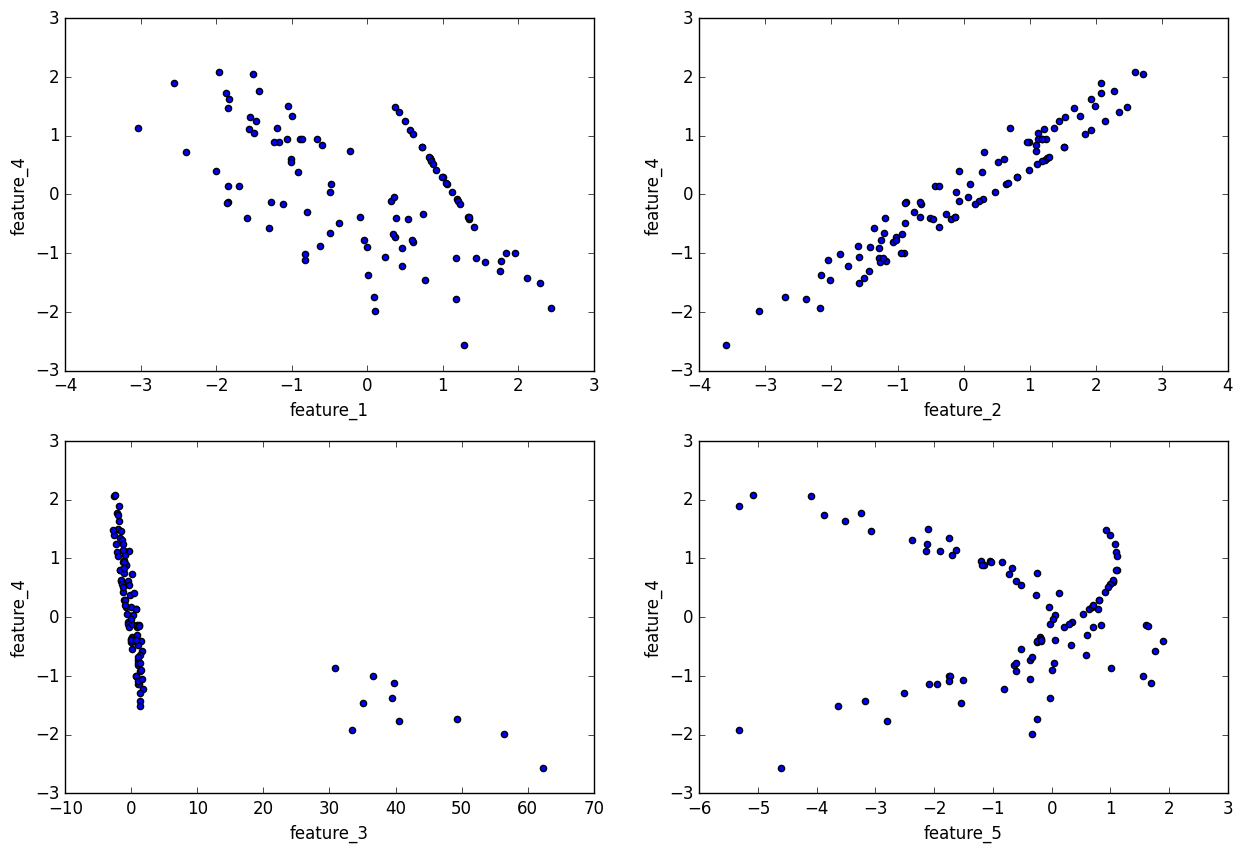

In [139]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, feature in enumerate(df.columns.drop('feature_4')):
    df.plot.scatter(x=feature,
                    y='feature_4',
                    ax=axes[i // 2, i % 2])
    
plt.show()

По графикам можно сделать вывод, что в модель регрессии имеет смысл включить переменные feature_1, feature_2, feature_3, feature_5. Они имеют зависимость от feature_4.